In [2]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler,Normalizer,StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import warnings
import os
import shutil
warnings.filterwarnings("ignore")

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


# Select the K value

In [ ]:
df = pd.read_csv('./SSeg_Result.csv', index_col='OBJECTID')
df.head(5)

In [ ]:
feature_all = df.drop(['id', 'lng', 'lat'], axis=1)
feature_all.head(5)

### Elbow Method

In [ ]:
# Elbow Method
inertia = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, max_iter=1500, n_init=40, init='k-means++').fit(feature_all)
    inertia.append(np.sqrt(kmeans.inertia_))
plt.plot(range(2,11), inertia, 'o-')
plt.xlabel('k')
plt.savefig('./kmeans.svg',format='svg')
plt.show()

### Silhouette Coefficient Method

In [ ]:
# Silhouette Coefficient Method
sil_score = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(feature_all)
    sil_score.append(silhouette_score(feature_all, kmeans.labels_))
plt.plot(range(2,11), sil_score, 'o-')
plt.xlabel('k')
plt.savefig('./kmeans2.svg',format='svg')
plt.show()

# K-means clustering

In [ ]:
num_clusters = 5
km_cluster = KMeans(n_clusters=num_clusters, max_iter=1500, n_init=40, init='k-means++')

# Return the cluster index assigned to each text
result = km_cluster.fit_predict(feature_all)

In [ ]:
result_df = pd.DataFrame(result)
result_df.head(5)

In [ ]:
vc = result_df[0].value_counts()
print(vc)
print(type(vc))

# Visualization

In [3]:
kmeans_df = pd.read_csv('./SSeg_Result_Kmeans_k5.csv')
kmeans_df.head(5)

,OBJECTID,id,lng,lat,wall,building,sky,tree,ceiling,road,...,car,sea,fence,sand,bridge,palm,boat,bus,truck,Kmeans
0,0.0,"100010_114.218769324,22.6337590538_201312_35.3...",114.218769,22.633759,0.001124,0.396332,0.402073,0.029020,0.0,0.082060,...,0.005597,0.0,0.004190,0.0,0.0,0.0,0.000000,0.003034,0.000113,1
1,1.0,"10001_113.829067738,22.7694444258_201312_349.5...",113.829068,22.769444,0.000000,0.726338,0.136815,0.000000,0.0,0.044535,...,0.029466,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,4
2,2.0,"100021_114.221782151,22.6392166866_201312_288....",114.221782,22.639217,0.019592,0.105829,0.365000,0.279491,0.0,0.066250,...,0.007494,0.0,0.004347,0.0,0.0,0.0,0.000000,0.003474,0.000050,3
3,3.0,"100029_114.221400724,22.6388248633_201312_336....",114.221401,22.638825,0.000000,0.184969,0.472406,0.080101,0.0,0.056840,...,0.018505,0.0,0.019818,0.0,0.0,0.0,0.043015,0.002582,0.000000,0
4,4.0,"10002_113.82916299,22.7689670523_201312_349.67...",113.829163,22.768967,0.000000,0.782456,0.094912,0.000000,0.0,0.062871,...,0.049887,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,4


Text(0.5, 0, 'tree')

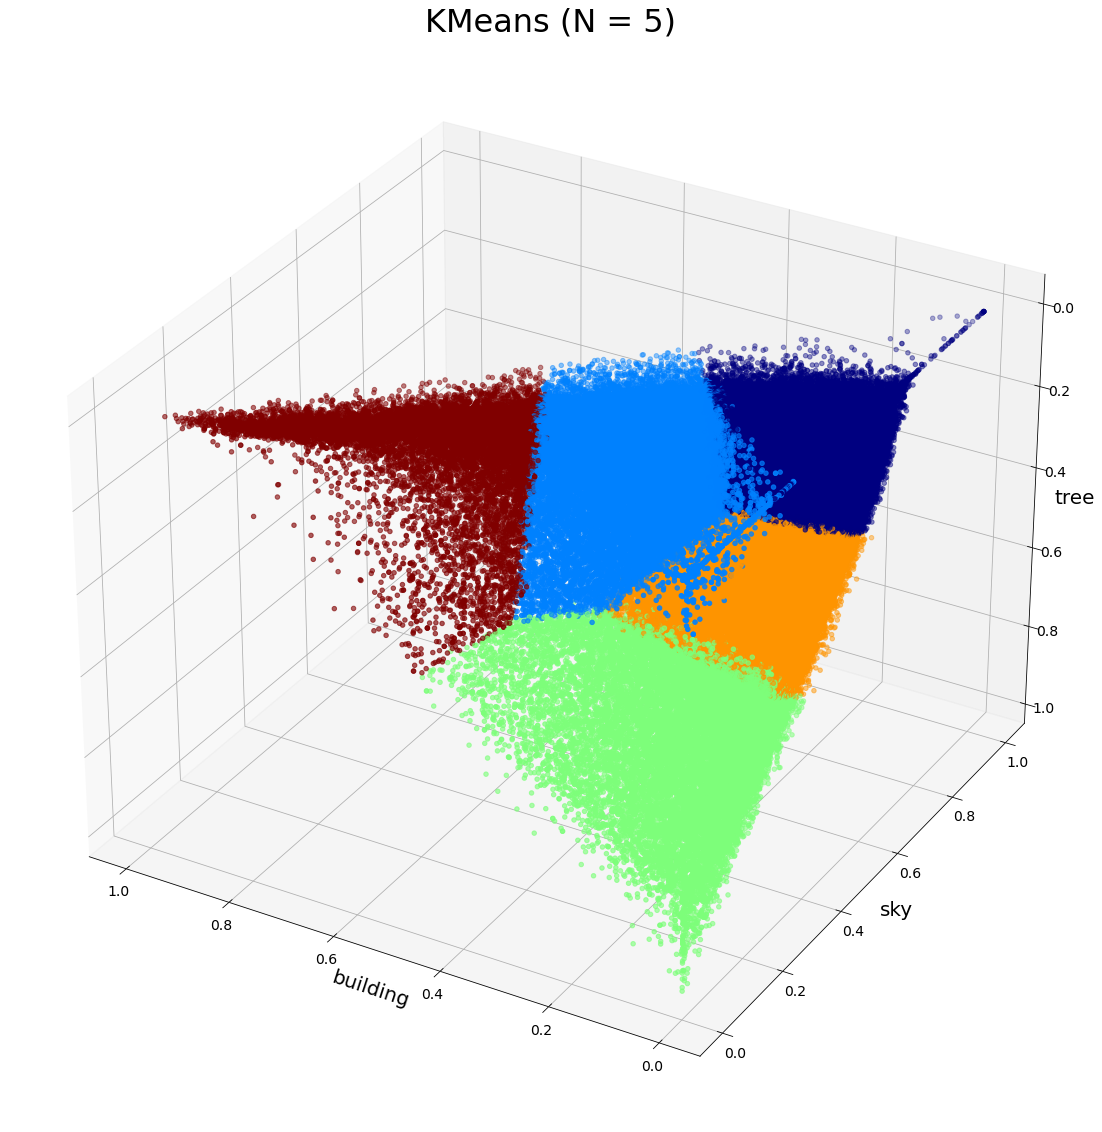

In [15]:
from mpl_toolkits.mplot3d import Axes3D

# Visualize based on the top three categories by average proportion: building, sky, and tree
# These three categories account for 77.92% in total
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection='3d')

# Define the x, y, and z data for the 3D scatter plot
x = kmeans_df['building']
y = kmeans_df['sky']
z = kmeans_df['tree']
kmeans_result = kmeans_df['Kmeans']

# Plot the 3D scatter plot
ax.scatter(x, y, z, c=kmeans_result, cmap="jet", marker="o")

# Invert the axes
ax.invert_xaxis()
ax.invert_yaxis()
ax.invert_zaxis()

# Set tick parameters and labels
plt.tick_params(labelsize=14)
plt.title("KMeans (N = 5)", fontsize=32)
ax.set_xlabel('Building', fontsize=20)
ax.set_ylabel('Sky', fontsize=20)
ax.set_zlabel('Tree', fontsize=20)